<a href="https://colab.research.google.com/github/quantwav/Project-dsff/blob/main/0321_1407_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook setup**

In [1]:
%matplotlib inline
# Use %matplotlib ipympl or %matplotlib widget if you want interactive matplotlib plots
#%matplotlib widget

# reloads modules automatically before entering the execution of code typed at the IPython prompt
%load_ext autoreload
%autoreload 2

In [2]:
# Package Imports
!pip install linearmodels
import linearmodels as lm  #for panel data econometrics
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sys
import time
import os

# To display dataframes as interactive tables in the notebook:
!pip install itables
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

# Add current directory to access common code in dp.py
#sys.path.insert(0, '/Users/mrrobert/Dropbox/mrrobert/Data')
#sys.path.insert(0, '.')

#import data_paths as dp

# Tolerance for tests
TOL = 1.0e-8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.6/215.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.3 MB/s eta 0:00:00


In [3]:
if not os.path.exists("crime_data_2023demo.csv"):
    !gdown 1ngS7TgJyoAJ4LrvmHTMZ9F01ml8YWWjS

Downloading...
From: https://drive.google.com/uc?id=1ngS7TgJyoAJ4LrvmHTMZ9F01ml8YWWjS
To: /content/crime_data_2023demo.csv
100% 3.84M/3.84M [00:00<00:00, 144MB/s]


In [5]:
df_raw_crime = (
    pd.read_csv('crime_data_2023demo.csv',parse_dates=['dispatch_date'])
)
df_raw_crime

<ipython-input-5-50d332f90808>:2: DtypeWarning: Columns (0,2,5,6,8,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('crime_data_2023demo.csv',parse_dates=['dispatch_date'])


the_geom  cartodb_id  \
0       0101000020E6100000F998388725CA52C0B8E9AE70BBF8...    156712.0   
1       0101000020E6100000EF36D2C68FC252C03254498D9E04...    158366.0   
2       0101000020E6100000F7E2725958C552C05C06397B2908...    176357.0   
3       0101000020E61000006AD97B6D8DC652C07AB107C51C04...    176995.0   
4       0101000020E6100000868C68B7EDC752C04413AC9AB5FE...    178603.0   
...                                                   ...         ...   
169012                                                NaN         NaN   
169013                                                NaN         NaN   
169014                                                NaN         NaN   
169015                                                NaN         NaN   
169016                                                NaN         NaN   

                                     the_geom_webmercator  objectid  dc_dist  \
0       0101000020110F000099238C9D84EA5FC10D72EEA7D787...  158780.0      3.0   
1       0101000020110F0000C3FBE05AA2DD5FC11EA4D4FD0495...  157978.0     15.0   
2       0101000020110F00002F3E46BB5CE25FC1A7348A39F398...  175404.0      2.0   
3       0101000020110F000010F568BB69E45FC102B540087594...  174916.0      2.0   
4       0101000020110F000025394721C0E65FC18706F24A778E...  180532.0     24.0   
...                                                   ...       ...      ...   
169012                                                NaN       NaN      NaN   
169013                                                NaN       NaN      NaN   
169014                                                NaN       NaN      NaN   
169015                                                NaN       NaN      NaN   
169016                                                NaN       NaN      NaN   

        psa      dispatch_date_time dispatch_date dispatch_time  hour  \
0         1  2023-01-01 01:29:00+00    2022-12-31      20:29:00  20.0   
1         3  2023-01-01 01:33:00+00    2022-12-31      20:33:00  20.0   
2         3  2023-01-01 00:31:00+00    2022-12-31      19:31:00  19.0   
3         1  2023-01-01 01:43:00+00    2022-12-31      20:43:00  20.0   
4         2  2023-01-01 02:07:00+00    2022-12-31      21:07:00  21.0   
...     ...                     ...           ...           ...   ...   
169012  NaN                     NaN           NaT           NaN   NaN   
169013  NaN                     NaN           NaT           NaN   NaN   
169014  NaN                     NaN           NaT           NaN   NaN   
169015  NaN                     NaN           NaT           NaN   NaN   
169016  NaN                     NaN           NaT           NaN   NaN   

              dc_key               location_block  ucr_general  \
0       2.020000e+11           900 BLOCK SOUTH ST        600.0   
1       2.020000e+11        4000 BLOCK COTTMAN AV        600.0   
2       2.020000e+11         7400 BLOCK OXFORD AV        600.0   
3       2.020000e+11  4600 BLOCK E ROOSEVELT BLVD        600.0   
4       2.020000e+11   2700 BLOCK KENSINGTON AV 2        600.0   
...              ...                          ...          ...   
169012           NaN                          NaN          NaN   
169013           NaN                          NaN          NaN   
169014           NaN                          NaN          NaN   
169015           NaN                          NaN          NaN   
169016           NaN                          NaN          NaN   

       text_general_code    point_x    point_y        lat        lng  \
0                 Thefts -75.158541  39.943220  39.943220 -75.158541   
1                 Thefts -75.040025  40.036089  40.036089 -75.040025   
2                 Thefts -75.083517  40.063766  40.063766 -75.083517   
3                 Thefts -75.102382  40.032128  40.032128 -75.102382   
4                 Thefts -75.123884  39.989917  39.989917 -75.123884   
...                  ...        ...        ...        ...        ...   
169012               NaN        NaN  

In [6]:
from sklearn.model_selection import train_test_split

# Duplicates and outliers
df_raw_crime.drop_duplicates(inplace=True)
df_raw_crime.dropna()

# df_raw_crime.replace({'X': -120.5, 'Y': 90.0}, pd.NA, inplace=True)

df_raw_crime

the_geom  cartodb_id  \
0     0101000020E6100000F998388725CA52C0B8E9AE70BBF8...    156712.0   
1     0101000020E6100000EF36D2C68FC252C03254498D9E04...    158366.0   
2     0101000020E6100000F7E2725958C552C05C06397B2908...    176357.0   
3     0101000020E61000006AD97B6D8DC652C07AB107C51C04...    176995.0   
4     0101000020E6100000868C68B7EDC752C04413AC9AB5FE...    178603.0   
...                                                 ...         ...   
1828  0101000020E61000006CB9AFDA27C352C068C2823D1E03...   2997093.0   
1829  0101000020E6100000E934A018B8C752C055C9D7D01300...   2997231.0   
1830  0101000020E610000072CBFDC477C952C05B83520F2C03...   3179314.0   
1831  0101000020E6100000A2629CBF09C552C04770A79DAF02...   3180729.0   
1832                                                NaN         NaN   

                                   the_geom_webmercator    objectid  dc_dist  \
0     0101000020110F000099238C9D84EA5FC10D72EEA7D787...    158780.0      3.0   
1     0101000020110F0000C3FBE05AA2DD5FC11EA4D4FD0495...    157978.0     15.0   
2     0101000020110F00002F3E46BB5CE25FC1A7348A39F398...    175404.0      2.0   
3     0101000020110F000010F568BB69E45FC102B540087594...    174916.0      2.0   
4     0101000020110F000025394721C0E65FC18706F24A778E...    180532.0     24.0   
...                                                 ...         ...      ...   
1828  0101000020110F000083D591ACA4DE5FC158331CB95A93...   2974522.0     15.0   
1829  0101000020110F000058E9F40C65E65FC1463F168AFB8F...   2970693.0     25.0   
1830  0101000020110F0000330C01785DE95FC17655D50C6A93...  14481361.0     35.0   
1831  0101000020110F0000CFD14E38D7E15FC131BAF008E092...  14481772.0     15.0   
1832                                                NaN         NaN      NaN   

      psa      dispatch_date_time dispatch_date dispatch_time  hour  \
0       1  2023-01-01 01:29:00+00    2022-12-31      20:29:00  20.0   
1       3  2023-01-01 01:33:00+00    2022-12-31      20:33:00  20.0   
2       3  2023-01-01 00:31:00+00    2022-12-31      19:31:00  19.0   
3       1  2023-01-01 01:43:00+00    2022-12-31      20:43:00  20.0   
4       2  2023-01-01 02:07:00+00    2022-12-31      21:07:00  21.0   
...   ...                     ...           ...           ...   ...   
1828    2  2023-01-04 13:16:00+00    2023-01-04       8:16:00   8.0   
1829    3  2023-01-04 17:05:00+00    2023-01-04      12:05:00  12.0   
1830    2  2023-01-04 05:00:00+00    2023-01-04       0:00:00   1.0   
1831    1  2023-01-04 05:00:00+00    2023-01-04       0:00:00  22.0   
1832  NaN                     NaN           NaT           NaN   NaN   

            dc_key               location_block  ucr_general  \
0     2.020000e+11           900 BLOCK SOUTH ST        600.0   
1     2.020000e+11        4000 BLOCK COTTMAN AV        600.0   
2     2.020000e+11         7400 BLOCK OXFORD AV        600.0   
3     2.020000e+11  4600 BLOCK E ROOSEVELT BLVD        600.0   
4     2.020000e+11   2700 BLOCK KENSINGTON AV 2        600.0   
...            ...                          ...          ...   
1828  2.020000e+11         6600 BLOCK DITMAN ST        700.0   
1829  2.020000e+11       400 BLOCK E ONTARIO ST        700.0   
1830  2.020000e+11        4700 BLOCK N BROAD ST        100.0   
1831  2.020000e+11          1600 BLOCK  DYRE ST        100.0   
1832           NaN                          NaN          NaN   

        text_general_code    point_x    point_y        lat        lng  \
0                  Thefts -75.158541  39.943220  39.943220 -75.158541   
1                  Thefts -75.040025  40.036089  40.036089 -75.040025   
2                  Thefts -75.083517  40.063766  40.063766 -75.083517   
3                  Thefts -75.102382  40.032128  40.032128 -75.102382   
4                  Thefts -75.123884  39.989917  39.989917 -75.123884   
...                   ...        ...        ...        ...        ...   
1828  Motor Vehicle Theft -75.049308  40.024360  40.024360 -75.049308   
1829  Motor Vehicle Theft -

In [7]:
# Split the dataset into training and testing sets (80% training, 20% testing)
train_data, test_data = train_test_split(df_raw_crime, test_size=0.2, random_state=42)

# Print the sizes of the training and testing sets
print("Training set size:", len(train_data))
print("Testing set size:", len(test_data))
train_data

Training set size: 1466
Testing set size: 367


the_geom  cartodb_id  \
1176  0101000020E610000049C91FCADFC352C09E891B7D6D05...   1151661.0   
1704  0101000020E6100000617904F5B5CB52C0F73DA89305FE...   1159903.0   
554   0101000020E610000076001F17B0CA52C0761CFD37C8F3...    197115.0   
721   0101000020E6100000AB2877024ECF52C0E19B85C125FC...   1154752.0   
903   0101000020E610000007502191D5CE52C04E10AFCA09FD...    180498.0   
...                                                 ...         ...   
1130  0101000020E61000002DC60AC828CE52C012FEE2A55DF9...   1143360.0   
1294  0101000020E6100000FAB8D329D1C452C0B7E82AFEEB03...   2991646.0   
860   0101000020E6100000CCE1E6960EC852C0ADB793A97E03...    160073.0   
1459  0101000020E61000003AC22F1642CA52C0BCFB0C3D1CFF...    193188.0   
1126  0101000020E61000008D0F928944CB52C0D231CE7C5AF8...   1142469.0   

                                   the_geom_webmercator   objectid  dc_dist  \
1176  0101000020110F0000B72D521BDDDF5FC1CD26018DEA95...  1151929.0      2.0   
1704  0101000020110F00006283C0C82CED5FC15BC8B12BB48D...  1142065.0     22.0   
554   0101000020110F0000EB9A23FA6FEB5FC172D2BB455C82...   195662.0      3.0   
721   0101000020110F000019CA039647F35FC1F762FF60A08B...  1152492.0     19.0   
903   0101000020110F0000EFF47D007BF25FC100798A199D8C...   177586.0     19.0   
...                                                 ...        ...      ...   
1130  0101000020110F00000010248255F15FC1AE9AA5598B88...  1156556.0     18.0   
1294  0101000020110F00002411BF1A77E15FC1A23BEAED3E94...  2971208.0     15.0   
860   0101000020110F0000153BD7F7F7E65FC12A2445AAC593...   162009.0     35.0   
1459  0101000020110F00004A3DF51FB5EA5FC165D54311E98E...   193469.0     22.0   
1126  0101000020110F000079A41F216CEC5FC1B5CB00426C87...  1156066.0     17.0   

     psa      dispatch_date_time dispatch_date dispatch_time  hour  \
1176   3  2023-01-03 09:06:00+00    2023-01-03       4:06:00   4.0   
1704   2  2023-01-04 13:40:00+00    2023-01-04       8:40:00   8.0   
554    3  2023-01-02 13:55:00+00    2023-01-02       8:55:00   8.0   
721    2  2023-01-03 02:16:00+00    2023-01-02      21:16:00  21.0   
903    2  2023-01-03 18:08:00+00    2023-01-03      13:08:00  13.0   
...   ..                     ...           ...           ...   ...   
1130   2  2023-01-04 03:48:00+00    2023-01-03      22:48:00  22.0   
1294   2  2023-01-03 05:29:00+00    2023-01-03       0:29:00   0.0   
860    2  2023-01-03 18:53:00+00    2023-01-03      13:53:00  13.0   
1459   1  2023-01-04 15:49:00+00    2023-01-04      10:49:00  10.0   
1126   1  2023-01-03 11:06:00+00    2023-01-03       6:06:00   6.0   

            dc_key                       location_block  ucr_general  \
1176  2.020000e+11               2100 BLOCK BRIGHTON ST       1400.0   
1704  2.020000e+11                 3000 BLOCK EUCLID AV       1400.0   
554   2.020000e+11  0 BLOCK LINCOLN FINANCIAL FIELD WAY        600.0   
721   2.020000e+11              6000 BLOCK W Girard Ave       2600.0   
903   2.020000e+11              5500 BLOCK LANSDOWNE AV        500.0   
...            ...                                  ...          ...   
1130  2.020000e+11              4900 BLOCK CATHARINE ST       2600.0   
1294  2.020000e+11                   6000 BLOCK SAUL ST        700.0   
860   2.020000e+11               100 BLOCK W ASHDALE ST        600.0   
1459  2.020000e+11             2600 BLOCK N COLORADO ST        500.0   
1126  2.020000e+11              1900 BLOCK CARPENTER ST       1400.0   

                text_general_code    point_x    point_y        lat        lng  \
1176  Vandalism/Criminal Mischief -75.060534  40.042404  40.042404 -75.060534   
1704  Vandalism/Criminal Mischief -75.182981  39.984545  39.984545 -75.182981   
554                        Thefts -75.166998  39.904548  39.904548 -75.166998   
721            All Other Offenses -75.239136  39.969902  39.969902 -75.239136   
903          Burglary Residential -75.231785  39.976861  39.976861 -75.231785   
...                           ...        ...        .

In [8]:
train_data.duplicated().sum()

0

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-9-6bb2e8326d40>:26: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


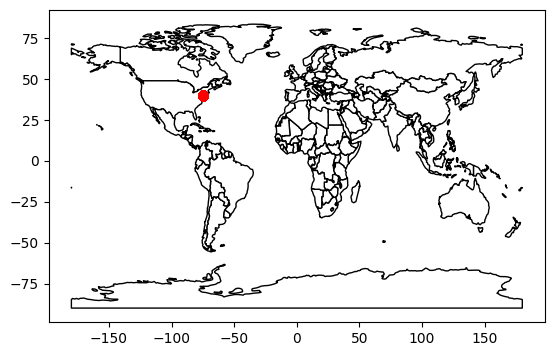

In [9]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

def create_gdf(train_data):
    # Create a copy of the DataFrame
    gdf = train_data.copy()

    # Combine the latitude and longitude columns into a single 'Coordinates' column
    gdf['Coordinates'] = list(zip(gdf.lng, gdf.lat))

    # Convert the 'Coordinates' column to Point objects
    gdf.Coordinates = gdf.Coordinates.apply(Point)

    # Create a GeoDataFrame from the DataFrame with geometry set to 'Coordinates'
    # and coordinate reference system (CRS) set to EPSG 4326
    gdf = gpd.GeoDataFrame(
        gdf, geometry='Coordinates', crs={'init': 'epsg:4326'})

    return gdf

# You need to replace 'df' with your actual dataset
train_gdf = create_gdf(train_data)

# Read world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map with land areas in white and boundaries in black
ax = world.plot(color='white', edgecolor='black')

# Plot the training GeoDataFrame on top of the world map with red color
train_gdf.plot(ax=ax, color='red')

# Show the plot
plt.show()


<ipython-input-10-bd0ff1d84221>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=incident_count_per_day, shade=True)


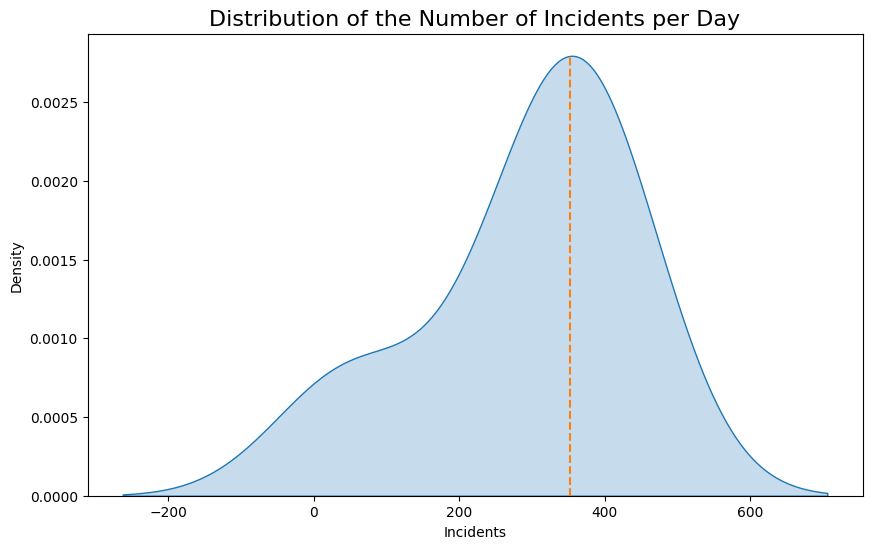

In [10]:
col = sns.color_palette()

# Calculate the date and hour
train_data['Date'] = train_data.dispatch_date.dt.date
train_data['Hour'] = train_data.dispatch_date.dt.hour

# Create the figure
plt.figure(figsize=(10, 6))

# Calculate the number of incidents per day and generate a kernel density plot
incident_count_per_day = train_data.groupby('Date').count().iloc[:, 0]
sns.kdeplot(data=incident_count_per_day, shade=True)

# Plot a dashed line at the median and add annotation
median_value = incident_count_per_day.median()
plt.axvline(x=median_value, ymax=0.95, linestyle='--', color=col[1])
plt.annotate('Median: ' + str(median_value),
             xy=(median_value, 0.004),
             xytext=(median_value + 200, 0.005),
             arrowprops=dict(arrowstyle='->', color=col[1], shrinkB=10))

# Set the title and axis labels
plt.title('Distribution of the Number of Incidents per Day', fontdict={'fontsize': 16})
plt.xlabel('Incidents')
plt.ylabel('Density')
plt.legend().remove()
plt.show()


In [11]:
# Extract the weekday information from the 'dispatch_date' column and assign it to a new column 'weekday'
train_data['weekday'] = train_data['dispatch_date'].dt.weekday

# Define a mapping between numerical representation of weekdays and their corresponding names
weekday_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Map the numerical representation of weekdays to their corresponding names using the mapping defined above
train_data['weekday'] = train_data['weekday'].map(weekday_mapping)

# Display the DataFrame with the added 'weekday' column containing the names of weekdays
train_data


the_geom  cartodb_id  \
1176  0101000020E610000049C91FCADFC352C09E891B7D6D05...   1151661.0   
1704  0101000020E6100000617904F5B5CB52C0F73DA89305FE...   1159903.0   
554   0101000020E610000076001F17B0CA52C0761CFD37C8F3...    197115.0   
721   0101000020E6100000AB2877024ECF52C0E19B85C125FC...   1154752.0   
903   0101000020E610000007502191D5CE52C04E10AFCA09FD...    180498.0   
...                                                 ...         ...   
1130  0101000020E61000002DC60AC828CE52C012FEE2A55DF9...   1143360.0   
1294  0101000020E6100000FAB8D329D1C452C0B7E82AFEEB03...   2991646.0   
860   0101000020E6100000CCE1E6960EC852C0ADB793A97E03...    160073.0   
1459  0101000020E61000003AC22F1642CA52C0BCFB0C3D1CFF...    193188.0   
1126  0101000020E61000008D0F928944CB52C0D231CE7C5AF8...   1142469.0   

                                   the_geom_webmercator   objectid  dc_dist  \
1176  0101000020110F0000B72D521BDDDF5FC1CD26018DEA95...  1151929.0      2.0   
1704  0101000020110F00006283C0C82CED5FC15BC8B12BB48D...  1142065.0     22.0   
554   0101000020110F0000EB9A23FA6FEB5FC172D2BB455C82...   195662.0      3.0   
721   0101000020110F000019CA039647F35FC1F762FF60A08B...  1152492.0     19.0   
903   0101000020110F0000EFF47D007BF25FC100798A199D8C...   177586.0     19.0   
...                                                 ...        ...      ...   
1130  0101000020110F00000010248255F15FC1AE9AA5598B88...  1156556.0     18.0   
1294  0101000020110F00002411BF1A77E15FC1A23BEAED3E94...  2971208.0     15.0   
860   0101000020110F0000153BD7F7F7E65FC12A2445AAC593...   162009.0     35.0   
1459  0101000020110F00004A3DF51FB5EA5FC165D54311E98E...   193469.0     22.0   
1126  0101000020110F000079A41F216CEC5FC1B5CB00426C87...  1156066.0     17.0   

     psa      dispatch_date_time dispatch_date dispatch_time  hour  ...  \
1176   3  2023-01-03 09:06:00+00    2023-01-03       4:06:00   4.0  ...   
1704   2  2023-01-04 13:40:00+00    2023-01-04       8:40:00   8.0  ...   
554    3  2023-01-02 13:55:00+00    2023-01-02       8:55:00   8.0  ...   
721    2  2023-01-03 02:16:00+00    2023-01-02      21:16:00  21.0  ...   
903    2  2023-01-03 18:08:00+00    2023-01-03      13:08:00  13.0  ...   
...   ..                     ...           ...           ...   ...  ...   
1130   2  2023-01-04 03:48:00+00    2023-01-03      22:48:00  22.0  ...   
1294   2  2023-01-03 05:29:00+00    2023-01-03       0:29:00   0.0  ...   
860    2  2023-01-03 18:53:00+00    2023-01-03      13:53:00  13.0  ...   
1459   1  2023-01-04 15:49:00+00    2023-01-04      10:49:00  10.0  ...   
1126   1  2023-01-03 11:06:00+00    2023-01-03       6:06:00   6.0  ...   

      ucr_general            text_general_code    point_x    point_y  \
1176       1400.0  Vandalism/Criminal Mischief -75.060534  40.042404   
1704       1400.0  Vandalism/Criminal Mischief -75.182981  39.984545   
554         600.0                       Thefts -75.166998  39.904548   
721        2600.0           All Other Offenses -75.239136  39.969902   
903         500.0         Burglary Residential -75.231785  39.976861   
...           ...                          ...        ...        ...   
1130       2600.0           All Other Offenses -75.221239  39.948170   
1294        700.0          Motor Vehicle Theft -75.075266  40.030639   
860         600.0           Theft from Vehicle -75.125890  40.027303   
1459        500.0         Burglary Residential -75.160284  39.993049   
1126       1400.0  Vandalism/Criminal Mischief -75.176058  39.940261   

            lat        lng  Unnamed: 18        Date  Hour    weekday  
1176  40.042404 -75.060534          NaN  2023-01-03   0.0    Tuesday  
1704  39.984545 -75.182981          NaN  2023-01-04   0.0  Wednesday  
554   39.904548 -75.166998          NaN  2023-01-02   0.0     Monday  
721   39.969902 -75.239136          NaN  2023-01-02   0.0     Monday  
903   39.976861 -75.231785          NaN  2023-01-03   0.0    Tuesday  
...         ...        ...          ...         ...  

In [12]:
data = train_data.groupby('weekday').count().iloc[:, 0]
data = data.reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
    'Sunday'
])
data

weekday
Monday       352.0
Tuesday      394.0
Wednesday    386.0
Thursday       NaN
Friday         NaN
Saturday      49.0
Sunday       274.0
Name: the_geom, dtype: float64

<ipython-input-13-d20f2455eaa0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-13-d20f2455eaa0>:7: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(


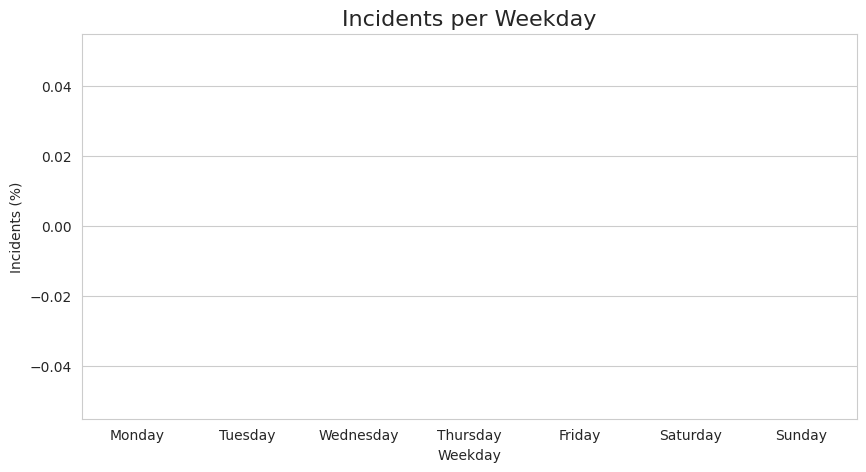

In [13]:
from matplotlib import cm  # Importing colormap module from matplotlib

plt.figure(figsize=(10, 5))  # Creating a figure with size 10x5 inches

with sns.axes_style("whitegrid"):  # Setting seaborn's axes style to "whitegrid"
    # Creating a bar plot
    ax = sns.barplot(
        x=data.index,  # X-axis data (weekdays)
        y=(data.values / data.values.sum()) * 100,  # Y-axis data (percentage of incidents)
        orient='v',  # Orientation of the bars (vertical)
        palette=cm.ScalarMappable(cmap='Reds').to_rgba(data.values)  # Color palette for the bars
    )

# Setting title, xlabel, and ylabel
plt.title('Incidents per Weekday', fontdict={'fontsize': 16})
plt.xlabel('Weekday')
plt.ylabel('Incidents (%)')

# Displaying the plot
plt.show()


In [14]:
train_data

the_geom  cartodb_id  \
1176  0101000020E610000049C91FCADFC352C09E891B7D6D05...   1151661.0   
1704  0101000020E6100000617904F5B5CB52C0F73DA89305FE...   1159903.0   
554   0101000020E610000076001F17B0CA52C0761CFD37C8F3...    197115.0   
721   0101000020E6100000AB2877024ECF52C0E19B85C125FC...   1154752.0   
903   0101000020E610000007502191D5CE52C04E10AFCA09FD...    180498.0   
...                                                 ...         ...   
1130  0101000020E61000002DC60AC828CE52C012FEE2A55DF9...   1143360.0   
1294  0101000020E6100000FAB8D329D1C452C0B7E82AFEEB03...   2991646.0   
860   0101000020E6100000CCE1E6960EC852C0ADB793A97E03...    160073.0   
1459  0101000020E61000003AC22F1642CA52C0BCFB0C3D1CFF...    193188.0   
1126  0101000020E61000008D0F928944CB52C0D231CE7C5AF8...   1142469.0   

                                   the_geom_webmercator   objectid  dc_dist  \
1176  0101000020110F0000B72D521BDDDF5FC1CD26018DEA95...  1151929.0      2.0   
1704  0101000020110F00006283C0C82CED5FC15BC8B12BB48D...  1142065.0     22.0   
554   0101000020110F0000EB9A23FA6FEB5FC172D2BB455C82...   195662.0      3.0   
721   0101000020110F000019CA039647F35FC1F762FF60A08B...  1152492.0     19.0   
903   0101000020110F0000EFF47D007BF25FC100798A199D8C...   177586.0     19.0   
...                                                 ...        ...      ...   
1130  0101000020110F00000010248255F15FC1AE9AA5598B88...  1156556.0     18.0   
1294  0101000020110F00002411BF1A77E15FC1A23BEAED3E94...  2971208.0     15.0   
860   0101000020110F0000153BD7F7F7E65FC12A2445AAC593...   162009.0     35.0   
1459  0101000020110F00004A3DF51FB5EA5FC165D54311E98E...   193469.0     22.0   
1126  0101000020110F000079A41F216CEC5FC1B5CB00426C87...  1156066.0     17.0   

     psa      dispatch_date_time dispatch_date dispatch_time  hour  ...  \
1176   3  2023-01-03 09:06:00+00    2023-01-03       4:06:00   4.0  ...   
1704   2  2023-01-04 13:40:00+00    2023-01-04       8:40:00   8.0  ...   
554    3  2023-01-02 13:55:00+00    2023-01-02       8:55:00   8.0  ...   
721    2  2023-01-03 02:16:00+00    2023-01-02      21:16:00  21.0  ...   
903    2  2023-01-03 18:08:00+00    2023-01-03      13:08:00  13.0  ...   
...   ..                     ...           ...           ...   ...  ...   
1130   2  2023-01-04 03:48:00+00    2023-01-03      22:48:00  22.0  ...   
1294   2  2023-01-03 05:29:00+00    2023-01-03       0:29:00   0.0  ...   
860    2  2023-01-03 18:53:00+00    2023-01-03      13:53:00  13.0  ...   
1459   1  2023-01-04 15:49:00+00    2023-01-04      10:49:00  10.0  ...   
1126   1  2023-01-03 11:06:00+00    2023-01-03       6:06:00   6.0  ...   

      ucr_general            text_general_code    point_x    point_y  \
1176       1400.0  Vandalism/Criminal Mischief -75.060534  40.042404   
1704       1400.0  Vandalism/Criminal Mischief -75.182981  39.984545   
554         600.0                       Thefts -75.166998  39.904548   
721        2600.0           All Other Offenses -75.239136  39.969902   
903         500.0         Burglary Residential -75.231785  39.976861   
...           ...                          ...        ...        ...   
1130       2600.0           All Other Offenses -75.221239  39.948170   
1294        700.0          Motor Vehicle Theft -75.075266  40.030639   
860         600.0           Theft from Vehicle -75.125890  40.027303   
1459        500.0         Burglary Residential -75.160284  39.993049   
1126       1400.0  Vandalism/Criminal Mischief -75.176058  39.940261   

            lat        lng  Unnamed: 18        Date  Hour    weekday  
1176  40.042404 -75.060534          NaN  2023-01-03   0.0    Tuesday  
1704  39.984545 -75.182981          NaN  2023-01-04   0.0  Wednesday  
554   39.904548 -75.166998          NaN  2023-01-02   0.0     Monday  
721   39.969902 -75.239136          NaN  2023-01-02   0.0     Monday  
903   39.976861 -75.231785          NaN  2023-01-03   0.0    Tuesday  
...         ...        ...          ...         ...  

In [15]:
data = train_data.groupby('text_general_code').count().iloc[:, 0].sort_values(
    ascending=False)
#data = data.reindex(np.append(np.delete(data.index, 1), 'OTHER OFFENSES'))
data

text_general_code
Thefts                                     284
Other Assaults                             245
Vandalism/Criminal Mischief                182
Motor Vehicle Theft                        174
Theft from Vehicle                         122
All Other Offenses                          98
Fraud                                       45
Aggravated Assault No Firearm               44
Weapon Violations                           39
Aggravated Assault Firearm                  34
Burglary Residential                        34
Robbery Firearm                             32
Robbery No Firearm                          26
Narcotic / Drug Law Violations              25
Receiving Stolen Property                   18
Burglary Non-Residential                    14
Rape                                        11
Other Sex Offenses (Not Commercialized)      9
DRIVING UNDER THE INFLUENCE                  7
Homicide - Criminal                          3
Forgery and Counterfeiting                   3
Embezzlement                                 2
Prostitution and Commercialized Vice         2
Offenses Against Family and Children         1
Disorderly Conduct                           1
Name: the_geom, dtype: int64

<ipython-input-16-042d2660fdfd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


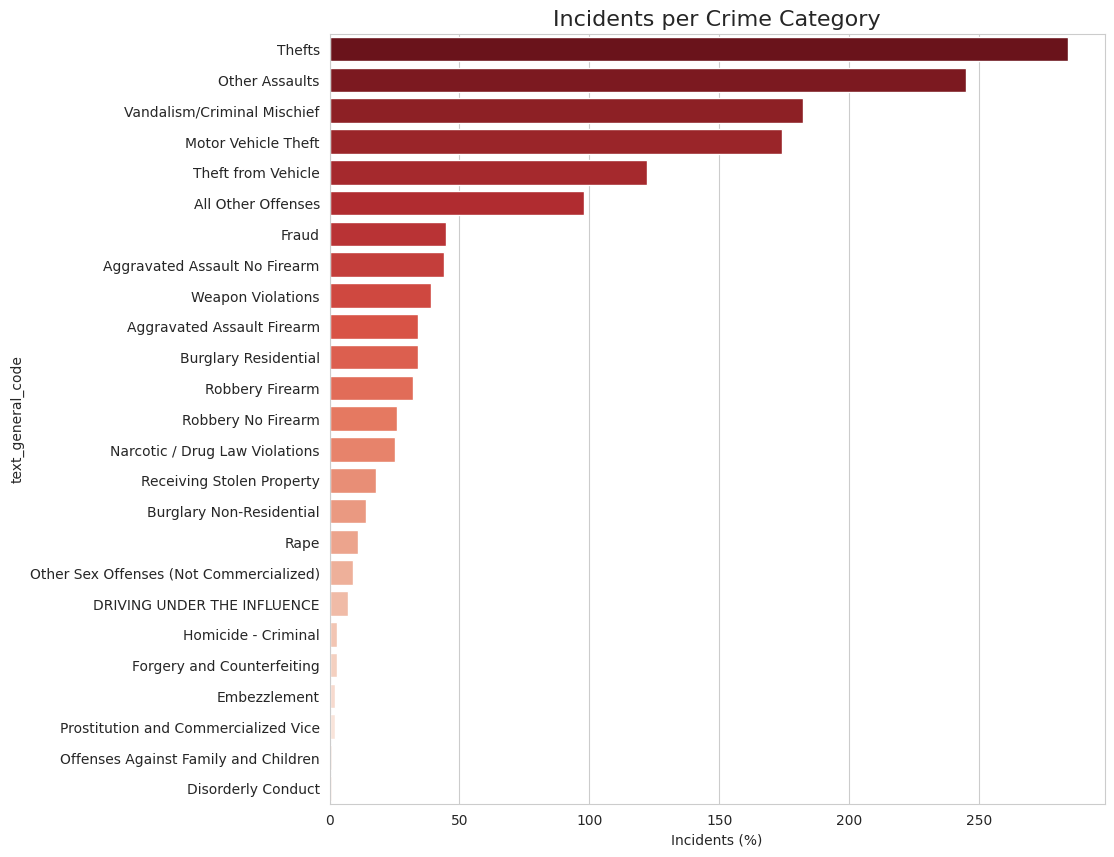

In [16]:
plt.figure(figsize=(10, 10))  # Creating a figure with size 10x10 inches

with sns.axes_style("whitegrid"):  # Setting seaborn's axes style to "whitegrid"
    # Creating a horizontal bar plot
    ax = sns.barplot(
        x=data.values,  # X-axis data (percentage of incidents)
        y=data.index,  # Y-axis data (crime categories)
        orient='h',  # Orientation of the bars (horizontal)
        palette="Reds_r"  # Color palette for the bars (reversed 'Reds' colormap)
    )

# Setting title and xlabel
plt.title('Incidents per Crime Category', fontdict={'fontsize': 16})
plt.xlabel('Incidents (%)')

# Displaying the plot
plt.show()
